<a href="https://colab.research.google.com/github/karsarobert/Deep-Learning-2023/blob/main/07/PTE_DL7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning gyakorlat


## 7. gyakorlat: konvolúciós hálózat
### 2023. október 18.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras.utils import *
from tensorflow.keras.layers import *
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.applications import ResNet50

%matplotlib inline

# Konvolúciós neurális hálózati architektúrák megvalósítása
### tensorflow/keras használatával
 - 1x1 convolution
 - skip-connection
 - batch normalization
 - global pooling

# 1. LeNet-5 (1998)

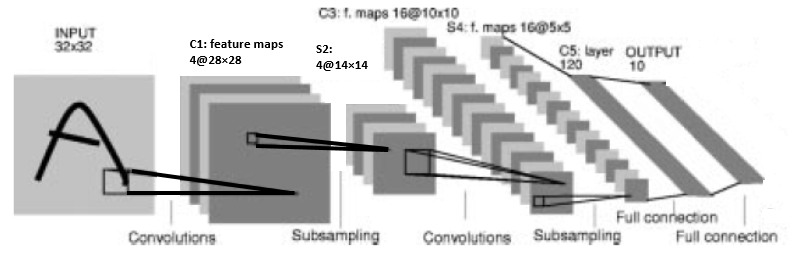

In [ ]:
from tensorflow.keras import Sequential

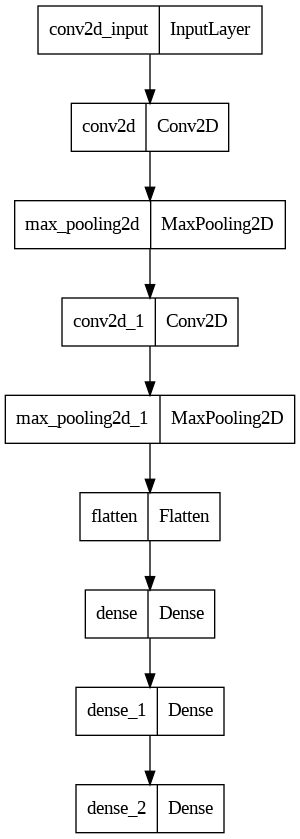

In [ ]:
lenet = Sequential()
lenet.add(Conv2D(kernel_size=(5, 5), filters=6, activation='tanh', input_shape=(32, 32, 3)))
lenet.add(MaxPool2D())
lenet.add(Conv2D(kernel_size=(5, 5), filters=16, activation='tanh'))
lenet.add(MaxPool2D())
lenet.add(Flatten())
lenet.add(Dense(120, activation='tanh'))
lenet.add(Dense(84, activation='tanh'))
lenet.add(Dense(10, activation='softmax'))

lenet.compile(optimizer=SGD(learning_rate=1e-2), loss='categorical_crossentropy', metrics=['accuracy'])
plot_model(lenet)

In [ ]:
lenet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

# 2. VGG16 (2014)

- ImageNet 2014 2. hely, de a legjobb egyéni modell

Ugyanúgy megvalósíthatjuk, mint a LeNet-5-öt, csak egy kicsit több réteget kell hozzáadni!
 - és ReLU aktiválást kell használnunk
 - 3x3-as konvolúciót használjunk
 - és esetleg dropout / batchnorm a jobb teljesítmény érdekében.

<img src="https://html.scirp.org/file/4-7800353x6.png">

Img source: https://file.scirp.org/Html/4-7800353_65406.htm

# 3. Multi-head konvolúciók - GoogLeNet (2014)
 - 2014 ImageNet győztes
 - első szerző: Christian Szegedy
 - összetettebb, mint a VGG

Építőelem: Inception modul
 - 1x1 konv mint szűk keresztmetszet

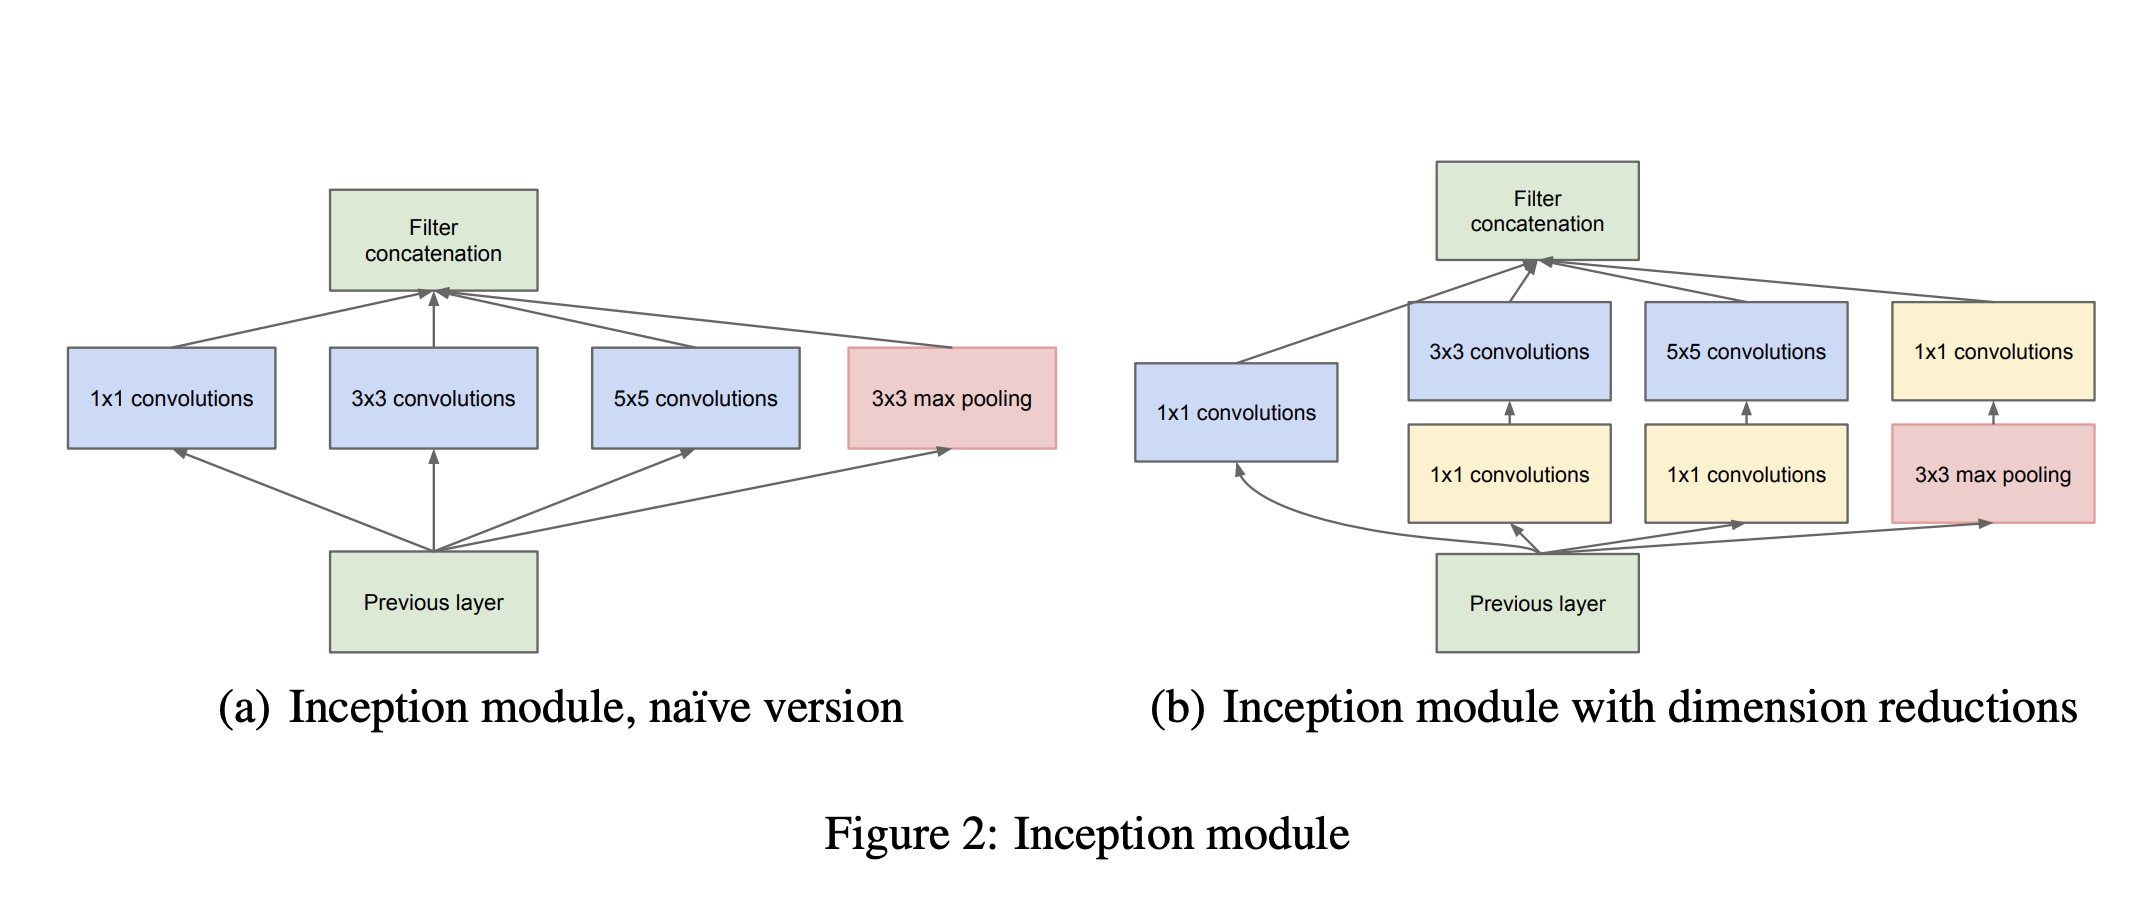



Source: https://arxiv.org/abs/1409.4842



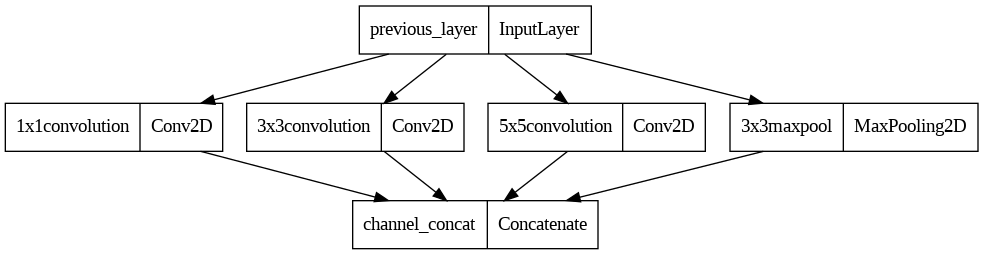

In [ ]:
# do not write out the activations now!
inputs = Input(shape=(224, 224, 3), name='previous_layer')
c1 = Conv2D(3, (1, 1), padding='same', name='1x1convolution')(inputs)
c3 = Conv2D(16, (3, 3), padding='same', name='3x3convolution')(inputs)
c5 = Conv2D(16, (5, 5), padding='same', name='5x5convolution')(inputs)
mp = MaxPool2D((3, 3), strides=1, padding='same', name='3x3maxpool')(inputs)
outputs = Concatenate(axis=-1, name='channel_concat')([c1, c3, c5, mp])
inception_module = Model(inputs = inputs, outputs = outputs)

plot_model(inception_module)

In [ ]:
inception_module.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 previous_layer (InputLayer  [(None, 224, 224, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 1x1convolution (Conv2D)     (None, 224, 224, 3)          12        ['previous_layer[0][0]']      
                                                                                                  
 3x3convolution (Conv2D)     (None, 224, 224, 16)         448       ['previous_layer[0][0]']      
                                                                                                  
 5x5convolution (Conv2D)     (None, 224, 224, 16)         1216      ['previous_layer[0][0]']  

Kódoljuk le a **(b)** pontot!

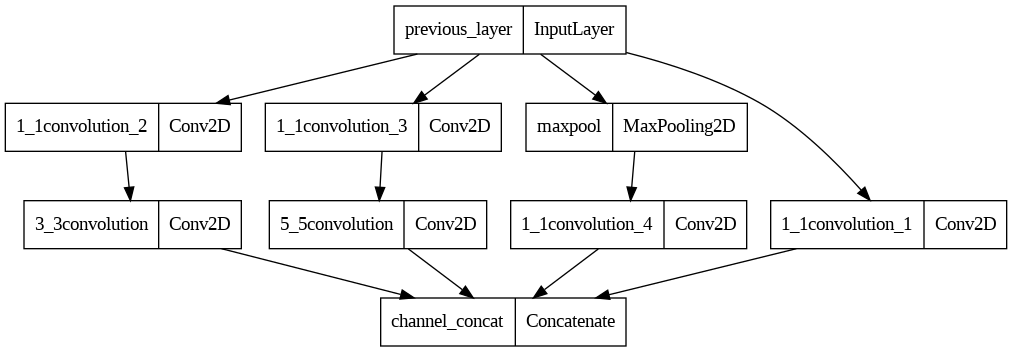

In [ ]:
# do not write out the activations now!
inputs = Input(shape=(224, 224, 3), name='previous_layer')
c1 = Conv2D(3, (1, 1), padding='same', name='1_1convolution_1')(inputs)

c3 = Conv2D(3, (1, 1), padding='same', name='1_1convolution_2')(inputs)
c3 = Conv2D(16, (3, 3), padding='same', name='3_3convolution')(c3)

c5 = Conv2D(3, (1, 1), padding='same', name='1_1convolution_3')(inputs)
c5 = Conv2D(16, (5, 5), padding='same', name='5_5convolution')(c5)

mp = MaxPool2D((3, 3), strides=1, padding='same', name='maxpool')(inputs)
mp = Conv2D(3, (1, 1), padding='same', name='1_1convolution_4')(mp)

outputs = Concatenate(axis=-1, name='channel_concat')([c1, c3, c5, mp])
inception_module = Model(inputs = inputs, outputs = outputs)

plot_model(inception_module)

#### Bottlenek effect of 1x1 conv

In [ ]:
m = Sequential()
m.add(Conv2D(512, (3, 3), input_shape=(200, 200, 512)))
m.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 198, 198, 512)     2359808   
                                                                 
Total params: 2359808 (9.00 MB)
Trainable params: 2359808 (9.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
m = Sequential()
m.add(Conv2D(128, (1, 1), input_shape=(200, 200, 512)))
m.add(Conv2D(512, (3, 3)))

m.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 200, 200, 128)     65664     
                                                                 
 conv2d_4 (Conv2D)           (None, 198, 198, 512)     590336    
                                                                 
Total params: 656000 (2.50 MB)
Trainable params: 656000 (2.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# 4. skip-connections

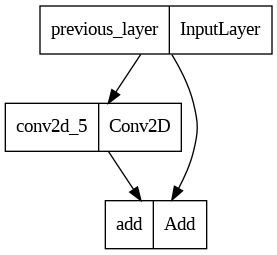

In [ ]:
# do not write out the activations now!
inputs = Input(shape=(224, 224, 3), name='previous_layer')

a = Conv2D(3, (3, 3), padding='same')(inputs)

outputs = Add()([inputs, a])
skip = Model(inputs = inputs, outputs = outputs)

plot_model(skip)

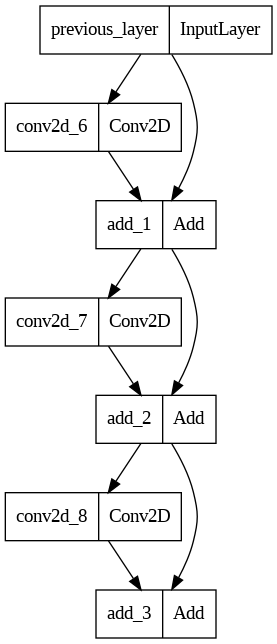

In [ ]:
# do not write out the activations now!
inputs = Input(shape=(224, 224, 3), name='previous_layer')

a = Conv2D(3, (3, 3), padding='same')(inputs)
b = Add()([inputs, a])

c = Conv2D(3, (3, 3), padding='same')(b)
d = Add()([c, b])

e = Conv2D(3, (3, 3), padding='same')(d)
outputs = Add()([e, d])

skip = Model(inputs = inputs, outputs = outputs)

plot_model(skip)

# 5. ResNet

<img src="http://patbaa.web.elte.hu/resnet50.png">

Source: Ji et al: Optimized Deep Convolutional Neural Networks for Identification of Macular Diseases from Optical Coherence Tomography Images

102967424/102967424 [==============================] - 0s 0us/step


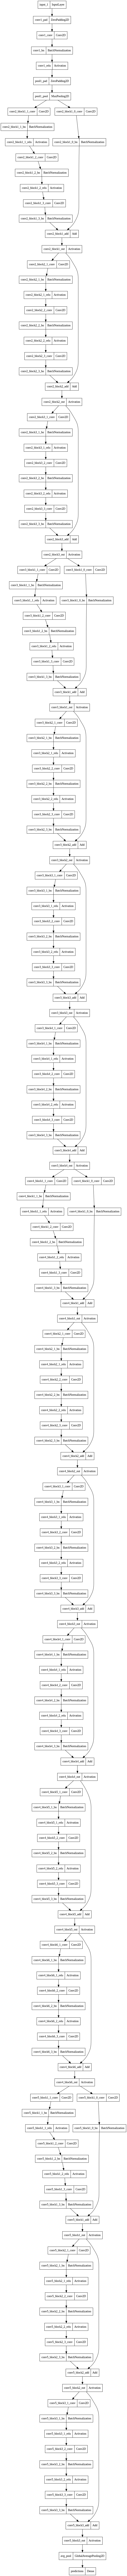

In [ ]:
resnet50 = ResNet50()
plot_model(resnet50)

In [ ]:
resnet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

# 6. Beépített architektúrák

In [ ]:
from tensorflow.keras import applications

In [ ]:
dir(applications)

['ConvNeXtBase',
 'ConvNeXtLarge',
 'ConvNeXtSmall',
 'ConvNeXtTiny',
 'ConvNeXtXLarge',
 'DenseNet121',
 'DenseNet169',
 'DenseNet201',
 'EfficientNetB0',
 'EfficientNetB1',
 'EfficientNetB2',
 'EfficientNetB3',
 'EfficientNetB4',
 'EfficientNetB5',
 'EfficientNetB6',
 'EfficientNetB7',
 'EfficientNetV2B0',
 'EfficientNetV2B1',
 'EfficientNetV2B2',
 'EfficientNetV2B3',
 'EfficientNetV2L',
 'EfficientNetV2M',
 'EfficientNetV2S',
 'InceptionResNetV2',
 'InceptionV3',
 'MobileNet',
 'MobileNetV2',
 'MobileNetV3Large',
 'MobileNetV3Small',
 'NASNetLarge',
 'NASNetMobile',
 'RegNetX002',
 'RegNetX004',
 'RegNetX006',
 'RegNetX008',
 'RegNetX016',
 'RegNetX032',
 'RegNetX040',
 'RegNetX064',
 'RegNetX080',
 'RegNetX120',
 'RegNetX160',
 'RegNetX320',
 'RegNetY002',
 'RegNetY004',
 'RegNetY006',
 'RegNetY008',
 'RegNetY016',
 'RegNetY032',
 'RegNetY040',
 'RegNetY064',
 'RegNetY080',
 'RegNetY120',
 'RegNetY160',
 'RegNetY320',
 'ResNet101',
 'ResNet101V2',
 'ResNet152',
 'ResNet152V2',
 'Re